In [ ]:
import matplotlib.pyplot as plt
import random
from PIL import Image,ImageFilter
from ipywidgets import Button,HBox,Output,Layout,Label
from IPython.display import display,clear_output


In [14]:
#載入撲克牌

cardimgs = []
pre_name = "/content/drive/MyDrive/2022Python/imagesDB/poker/"
for cc in range(54):
  fname = "poker{:02d}.png".format(cc)
  cardimgs.append(Image.open(pre_name+fname))

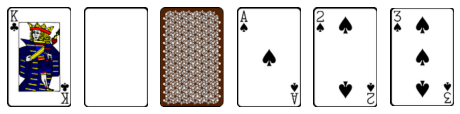

In [16]:
fig,axs  = plt.subplots(1,6,figsize=(8,4))
for i in range(-2,4):
  axs[i+2].axis(False)
  axs[i+2].imshow(cardimgs[i])

In [19]:
#撲克牌洗牌
players,suits_symbols = [],["\u2660","\u2665","\u2666","\u2663"]
deck = list(range(52))
random.shuffle(deck)
print(deck[:10])
for i in range(10):
  print("{}{:<2d}".format(suits_symbols[(deck[i])//13],deck[i]%13+1),end="")

[19, 15, 7, 46, 44, 10, 49, 17, 4, 3]
♥7 ♥3 ♠8 ♣8 ♣6 ♠11♣11♥5 ♠5 ♠4 

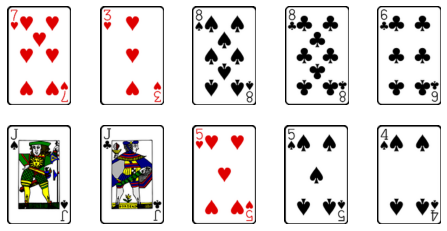

In [20]:
#顯示撲克牌
fig,axs = plt.subplots(2,5,figsize=(8,4))
c_idx = 0
for i in range(2):
  for j in range(5):
    axs[i,j].axis(False)
    axs[i,j].imshow(cardimgs[deck[c_idx]+1])
    c_idx+=1

In [21]:
#互動式翻牌遊戲
deck = list(range(52))
random.shuffle(deck)
print(deck[:10])
for i in range(10):
  s_no = deck[i]
  c_fo,c_no = s_no//13,s_no%13+1
  print("{}{:<2d}".format(suits_symbols[c_fo],c_no),end="")

[44, 5, 29, 45, 47, 40, 38, 14, 11, 30]
♣6 ♠6 ♦4 ♣7 ♣9 ♣2 ♦13♥2 ♠12♦5 

In [23]:
from pickle import LONG_BINGET
def show_imgs(img2):
  fig,axs=plt.subplots(1,2,figsize=(4,3))
  axs[0].imshow(cardimgs[0])
  axs[0].axis(False)
  axs[1].inshow(img2)
  axs[1].axis(False)
def on_bl_clicked(b):
  global deck_cnt,lb
  clear_output()
  deck_cnt=0 if deck_cnt==51 else deck_cnt+1
  lb.value="數字"+str(deck[deck_cnt]%13+1)
  display(HBox((b,lb)))
  show_imgs(cardimgs[deck[deck_cnt]+1])

AttributeError: ignored

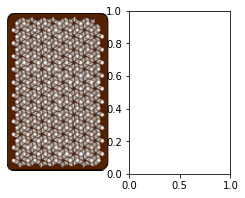

In [26]:
ly = Layout(width="100px") 
bl = Button(description="下一張",layout=ly)
deck_cnt,output = -1, Output()
lb = Label("數字0")
bl.on_click(on_bl_clicked)
display(HBox([bl,lb]))
show_imgs(cardimgs[-1])

In [27]:
def on_bl_clicked(b):
  global deck_cnt,lb,score
  clear_output()
  deck_cnt = 0 if deck_cnt==51 else deck_cnt+1
  numb = deck[deck_cnt]%13+1
  if (b.description=="A-6(小)" and numb<7)or \
    (b.description=="8-k(大)" and numb>7):
    score+=1
  elif b.description =="Lucky 7" and numb ==7:
    score+=10
  lb.value="分數"
  display(HBox([b1,b2,b3,lb]))
  show_imgs(cardimgs[deck[deck_cnt]+1])

AttributeError: ignored

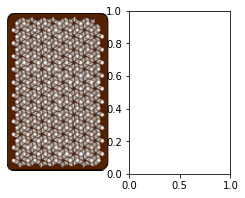

In [29]:
ly70 = Layout(width="70px")
b1 = Button(description="A-6(小)",layout=ly70)
b2 = Button(description="Lucky 7",layout=ly70)
b3 = Button(description="8-k(大)",layout=ly70)
b1.on_click(on_bl_clicked)
b2.on_click(on_bl_clicked)
b3.on_click(on_bl_clicked)
deck_cnt,score=-1,0
lb = Label("分數 0")
display(HBox([b1,b2,b3,lb]))
show_imgs(cardimgs[-1])